## Autoregressive (AR) Models

### Simulate AR(1) Time Series
You will simulate and plot a few AR(1) time series, each with a different parameter, ϕ, using the `arima_process` module in statsmodels. In this exercise, you will look at an AR(1) model with a large positive ϕ and a large negative ϕ, but feel free to play around with your own parameters.

There are a few conventions when using the arima_process module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with ϕ=0.9, the array representing the AR parameters would be `ar = np.array([1, -0.9])`

- Import the class ArmaProcess in the arima_process module.
- Plot the simulated AR procesees:
- Let ar1 represent an array of the AR parameters [1, −ϕ − ϕ ] as explained above. For now, the MA parmater array, ma1, will contain just the lag-zero coefficient of one.
- With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called AR_object1.
- Simulate 1000 data points from the object you just created, AR_object1, using the method  `.generate_sample()`. Plot the simulated data in a subplot.
- Repeat for the other AR parameter.

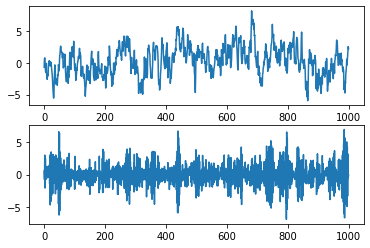

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

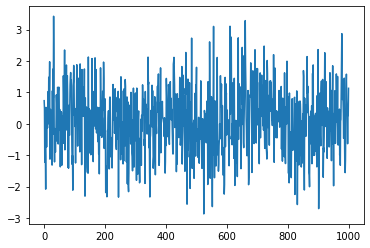

In [2]:
# Plot 3: AR parameter = +0.3
plt.subplot(1,1,1)
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)
plt.show();

### Compare the ACF for Several AR Time Series
The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, ϕ=+0.9, the first-lag autocorrelation will be 0.9, the second-lag will be (0.9)^2=0.81, the third-lag will be (0.9)^3=0.729, etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, the decay will flip signs, so the first-lag autocorrelation will be -0.9, the second-lag will be (−0.9)^2=0.81, the third-lag will be (−0.9)^3=−0.729, etc.

The object simulated_data_1 is the simulated time series with an AR parameter of +0.9, simulated_data_2 is for an AR parameter of -0.9, and simulated_data_3 is for an AR parameter of 0.3

- Compute the autocorrelation function for each of the three simulated datasets using the plot_acf function with 20 lags (and supress the confidence intervals by setting alpha=1).

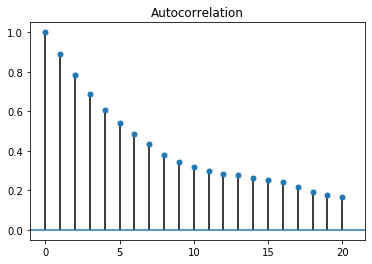

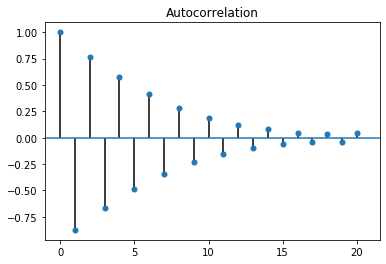

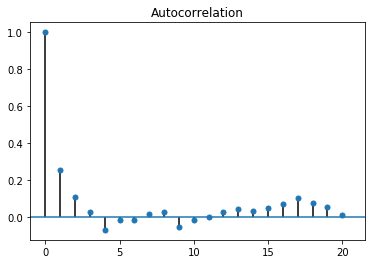

In [3]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

### Estimating an AR Model¶
You will estimate the AR(1) parameter, ϕ, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true ϕ of 0.9, you will print out the estimate of ϕ. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

- Import the class ARMA in the module statsmodels.tsa.arima_model.
- Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an AR(1)), is order=(1,0).
- Fit the model mod using the method .fit() and save it in a results object called res.
- Print out the entire summmary of results using the .summary() method.
- Just print out an estimate of the constant and ϕ using the .params attribute (no parentheses).

In [4]:
 # Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1452.328
Method:                       css-mle   S.D. of innovations              1.033
Date:                Mon, 09 Mar 2020   AIC                           2910.655
Time:                        22:47:57   BIC                           2925.379
Sample:                             0   HQIC                          2916.251
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3095      0.296      1.047      0.295      -0.270       0.889
ar.L1.y        0.8903      0.014     62.204      0.000       0.862       0.918
                                    Roots           

In [5]:
# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

When the true phi=0.9, the estimate of phi (and the constant) are:
[0.30948344 0.89033146]


### Forecasting with an AR Model
In addition to estimating the parameters of a model that you did in the last exercise, you can also do forecasting, both in-sample and out-of-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. These forecasts can be made using either the `predict()` method if you want the forecasts in the form of a series of data, or using the `plot_predict()` method if you want a plot of the forecasted data. You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

For the simulated series simulated_data_1 with ϕ=0.9, you will plot in-sample and out-of-sample forecasts.

- Import the class ARMA in the module statsmodels.tsa.arima_model
- Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an AR(1) order=(1,0)
- Fit the model mod using the method `.fit()` and save it in a results object called res
- Plot the in-sample and out-of-sample forecasts of the data using the `plot_predict()` method
- Start the forecast 10 data points before the end of the 1000 point series at 990, and end the forecast 10 data points after the end of the series at point 1010

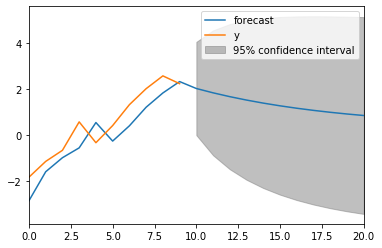

In [6]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

* 
Notice how, when phi is high like here, the forecast gradually moves to the long term mean of zero, but if phi were low, it would move much quicker to the long term mean.

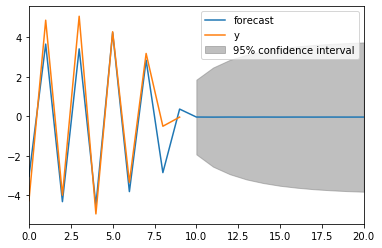

In [7]:
# Forecast the first AR(2) model
mod = ARMA(simulated_data_2, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

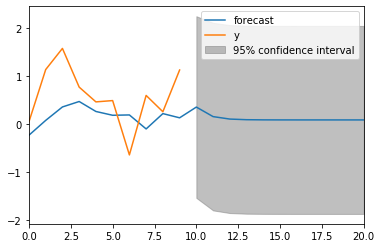

In [8]:
# Forecast the first AR(3) model
mod = ARMA(simulated_data_3, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

### Let's Forecast Interest Rates
You will now use the forecasting techniques you learned in the last exercise and apply it to real data rather than simulated data. You will revisit a dataset from the first chapter: the annual data of 10-year interest rates going back 56 years, which is in a Series called interest_rate_data. Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

You saw in the first chapter that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, but an AR model attempts to quantify how much they are expected to rise.

- Import the class ARMA in the module statsmodels.tsa.arima_model.
- Create an instance of the ARMA class called mod using the annual interest rate data and choosing the order for an AR(1) model.
- Fit the model mod using the method .fit() and save it in a results object called res.
- Plot the in-sample and out-of-sample forecasts of the data using the .plot_predict() method.
- Pass the arguments start=0 to start the in-sample forecast from the beginning, and choose end to be '2022' to forecast several years in the future.

In [9]:
interest_rate_data = pd.read_csv("Data/interest_rate_data.csv", parse_dates=True, index_col="DATE")
interest_rate_data.head()

,Unnamed: 1
DATE,
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21
1965-12-31,4.65
1966-12-31,4.64


C:\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


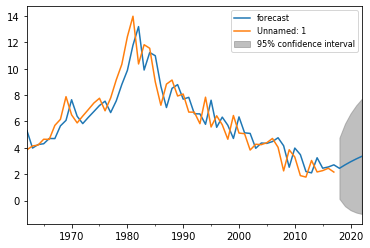

In [10]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(interest_rate_data, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0, end='2022')
plt.legend(fontsize=8)
plt.show()

### Compare AR Model with Random Walk
Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.
You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

- Import plot_acf function from the statsmodels module
- Create two axes for the two subplots
- Plot the autocorrelation function for 12 lags of the interest rate series interest_rate_data in the top plot
- Plot the autocorrelation function for 12 lags of the interest rate series simulated_data in the bottom plot

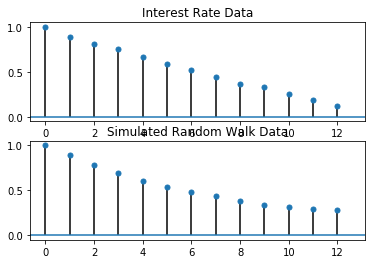

In [11]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data_1, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()


* Notice the Autocorrelation functions look very similar for the two series.

### Estimate Order of Model: PACF
One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). In this exercise, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. You will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.
Just like you used the plot_acf function in earlier exercises, here you will use a function called plot_pacf in the statsmodels module.

- Import the modules for simulating data and for plotting the PACF
- Simulate an AR(1) with ϕ=0.6 (remember that the sign for the AR parameter is reversed)
- Plot the PACF for simulated_data_1 using the plot_pacf function
- Simulate an AR(2) with ϕ1=0.6,ϕ2=0.3 (again, reverse the signs)
- Plot the PACF for simulated_data_2 using the plot_pacf function

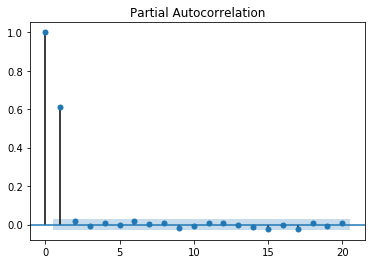

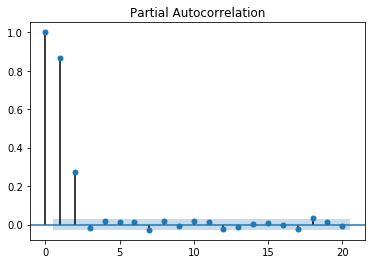

In [12]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()


* Notice that the number of significant lags for the PACF indicate the order of the AR model.

### Estimate Order of Model: Information Criteria

Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. You will take the AR(2) simulated data from the last exercise, saved as simulated_data_2, and compute the BIC as you vary the order, p, in an AR(p) from 0 to 6.

- Import the ARMA module for estimating the parameters and computing BIC.
- Initialize a numpy array BIC, which we will use to store the BIC for each AR(p) model.
- Loop through order p for p = 0,...,6.
- For each p, fit the data to an AR model of order p.
- For each p, save the value of BIC using the .bic attribute (no parentheses) of res.
- Plot BIC as a function of p (for the plot, skip p=0 and plot for p=1,...6).

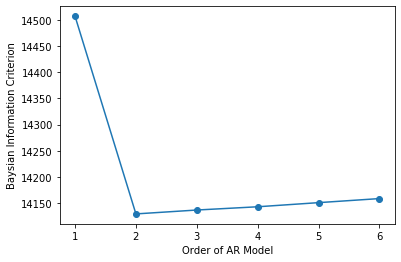

In [16]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Baysian Information Criterion')
plt.show()


* For an AR(2), the BIC achieves its minimum at p=2, which is what we expect.

### Moving Average (MA) and ARMA Models

#### Simulate MA(1) Time Series

You will simulate and plot a few MA(1) time series, each with a different parameter, θ, using the arima_process module in statsmodels, just as you did in the last chapter for AR(1) models. You will look at an MA(1) model with a large positive θ and a large negative θ.

As in the last chapter, when inputting the coefficients, you must include the zero-lag coefficient of 1, but unlike the last chapter on AR models, the sign of the MA coefficients is what we would expect. For example, for an MA(1) process with θ=−0.9, the array representing the MA parameters would be ma = np.array([1, -0.9])

- Import the class ArmaProcess in the arima_process module.
- Plot the simulated MA(1) processes
- Let ma1 represent an array of the AR parameters [1, θ] as explained above. The AR parmater array will contain just the lag-zero coeffienct of one.
- With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called MA_object1.
- Simulate 1000 data points from the object you just created, MA_object1, using the method .generate_sample(). Plot the simulated data in a subplot.
- Repeat for the other MA parameter.

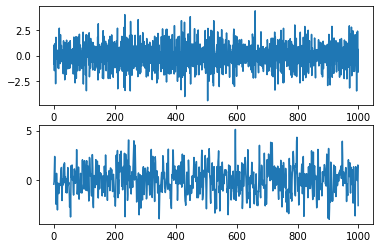

In [18]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

* The two MA parameters produce different time series plots, but in the next exercise you'll really be able to distinguish the time series.

### Compute the ACF for Several MA Time Series

Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an MA(1) model is not θ, but rather θ/(1+θ2). For example, if the MA parameter, θ, is = +0.9, the first-lag autocorrelation will be 0.9/(1+(0.9)2)=0.497, and the autocorrelation at all other lags will be zero. If the MA parameter, θ, is -0.9, the first-lag autocorrelation will be −0.9/(1+(−0.9)2)=−0.497.

You will verify these autocorrelation functions for the three time series you generated in the last exercise.

- simulated_data_1 is the simulated time series with an MA parameter of θ=−0.9, simulated_data_2 is for an MA paramter of θ=+0.9, and simulated_data_3 is for an MA parameter of θ=−0.3
- Compute the autocorrelation function for each of the three simulated datasets using the plot_acf function with 20 lags.

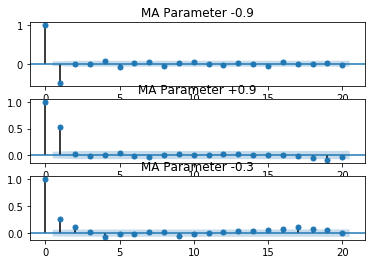

In [21]:
# Plot three ACF on same page for comparison using subplots
fig, axes = plt.subplots(3,1)

# Plot 1: AR parameter = -0.9
plot_acf(simulated_data_1, lags=20, ax=axes[0])
axes[0].set_title("MA Parameter -0.9")

# Plot 2: AR parameter = +0.9
plot_acf(simulated_data_2, lags=20, ax=axes[1])
axes[1].set_title("MA Parameter +0.9")

# Plot 3: AR parameter = -0.3
plot_acf(simulated_data_3, lags=20, ax=axes[2])
axes[2].set_title("MA Parameter -0.3")
plt.show()

### Estimating an MA Model

You will estimate the MA(1) parameter, θ, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true θ of -0.9, you will print out the estimate of θ. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

- Import the class ARMA in the module statsmodels.tsa.arima_model.
- Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an MA(1)), is order=(0,1).
- Fit the model mod using the method `.fit()` and save it in a results object called res.
- Print out the entire summmary of results using the `.summary()` method.
- Just print out an estimate of the constant and phi parameter using the .params attribute (no arguments).

In [23]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the consant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1360.888
Method:                       css-mle   S.D. of innovations              0.943
Date:                Mon, 09 Mar 2020   AIC                           2727.775
Time:                        23:05:16   BIC                           2742.498
Sample:                             0   HQIC                          2733.371
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0059      0.002      2.609      0.009       0.001       0.010
ma.L1.y       -0.9256      0.013    -70.336      0.000      -0.951      -0.900
                                    Roots           

### Forecasting with MA Model

As you did with AR models, you will use MA models to forecast in-sample and out-of-sample data using statsmodels.

For the simulated series simulated_data_1 with θ=−0.9, you will plot in-sample and out-of-sample forecasts. One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than one period in the future are simply the mean of the sample.

- Import the class ARMA in the module statsmodels.tsa.arima_model
- Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the (p,q) order of the model (in this case, for an MA(1), order=(0,1)
- Fit the model mod using the method `.fit()` and save it in a results object called res
- Plot the in-sample and out-of-sample forecasts of the data using the `.plot_predict()` method
- Start the forecast 10 data points before the end of the 1000 point series at 990, and end the forecast 10 data points after the end of the series at point 1010

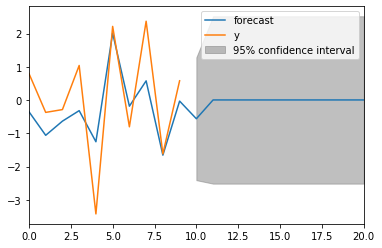

In [25]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

### High Frequency Stock Prices

Higher frequency stock data is well modeled by an MA(1) process, so it's a nice application of the models in this chapter.

The DataFrame intraday contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

Before you can analyze the time series data, you will have to clean it up a little, which you will do in this and the next two exercises. When you look at the first few rows, you'll notice several things. First, there are no column headers.The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of intraday data.

If you look at the data types, you'll notice that the DATE column is an object, which here means a string. You will need to change that to numeric before you can clean up some missing data.

- Manually change the first date to zero using `.iloc[0,0]`.
- Change the two column headers to 'DATE' and 'CLOSE' by setting intraday.columns equal to a list containing those two strings.
- Use the pandas attribute .dtypes (no parentheses) to see what type of data are in each column.
- Convert the DATE column to numeric using the pandas function `to_numeric()`.
- Make the DATE column the new index by using the pandas method `set_index()` which will take the DATE column as its argument.


In [38]:
intraday = pd.read_csv("Data/intraday.csv")
intraday.head()

,0,1
0,a1504272600,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


In [39]:
# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE','CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

DATE      object
CLOSE    float64
dtype: object


In [40]:
# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')
intraday.head()

,CLOSE
DATE,
0,8.2900
1,8.2700
2,8.2800
3,8.2750
4,8.2875


In [42]:
intraday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 390
Data columns (total 1 columns):
CLOSE    389 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


#### More Data Cleaning: Missing Data

When you print out the length of the DataFrame intraday, you will notice that a few rows are missing. There will be missing data if there are no trades in a particular one-minute interval. One way to see which rows are missing is to take the difference of two sets: the full set of every minute and the set of the DataFrame index which contains missing rows. You can fill in the missing rows with the .reindex() method, convert the index to time of day, and then plot the data.
Stocks trade at discrete one-cent increments (although a small percentage of trades occur in between the one-cent increments) rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over a one cent range. This is sometimes referred to as "bid/ask bounce".

- Print out the length of intraday using `len()`.
- Find the missing rows by making range(391) into a set and subtracting the set of the intraday index, intraday.index.
- Fill in the missing rows using the `.reindex()` method, setting the index equal to the full range(391) and forward filling the missing data by passing the argument method='ffill'.
- Change the index to times using pandas function `date_range()`, starting with '2017-08-28 9:30' and ending with '2017-08-28 16:00' and passing the argument freq='1min'.
- Plot the data and include gridlines.

In [44]:
# Notice that some rows are missing
print("The length of the DataFrame is: ",len(intraday))

# Find the missing rows
print("Missing rows: ", set(range(391)) - set(intraday.index))

The length of the DataFrame is:  389
Missing rows:  {182, 14}


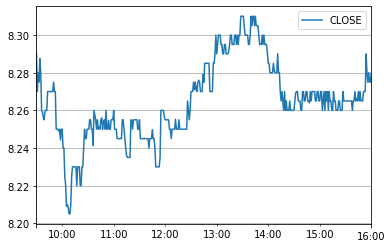

In [45]:
# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-08-28 9:30', end='2017-08-28 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

#### Applying an MA Model

The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but no autocorrelations at lags higher than 1. You get the same ACF pattern with an MA(1) model. Therefore, you will fit an MA(1) model to the intraday stock data from the last exercise.

The first step is to compute minute-by-minute returns from the prices in intraday, and plot the autocorrelation function. You should observe that the ACF looks like that for an MA(1) process. Then, fit the data to an MA(1), the same way you did for simulated data.

- Import plot_acf and ARMA modules from statsmodels
- Compute minute-to-minute returns from prices:
    - Compute returns with the `.pct_change()` method
    - Use the pandas method `.dropna()` to drop the first row of returns, which is NaN
- Plot the ACF function with lags up to 60 minutes
- Fit the returns data to an MA(1) model and print out the MA(1) parameter

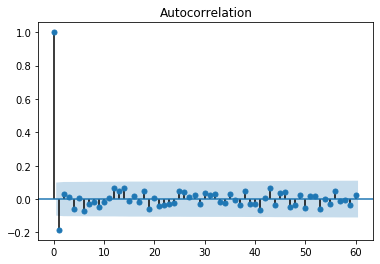

const         -0.000002
ma.L1.CLOSE   -0.179273
dtype: float64


In [47]:
# Import plot_acf and ARMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

* Notice the significant negative lag-1 autocorrelation, just like for an MA(1) model.

#### Equivalence of AR(1) and MA(infinity)

To better understand the relationship between MA models and AR models, you will demonstrate that an AR(1) model is equivalent to an MA(∞) model with the appropriate parameters.

You will simulate an MA model with parameters 0.8,0.82,0.83,… for a large number (30) lags and show that it has the same Autocorrelation Function as an AR(1) model with ϕ=0.8.

Note, to raise a number x to the power of an exponent n, use the format x**n.

- Import the modules for simulating data and plotting the ACF from statsmodels
- Use a list comprehension to build a list with exponentially decaying MA parameters: 1,0.8,0.82,0.83,…,
- Simulate 5000 observations of the MA(30) model
- Plot the ACF of the simulated series

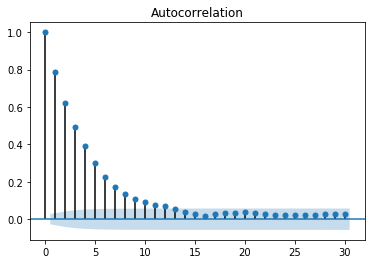

In [50]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

* Notice that the ACF looks the same as an AR(1) with parameter 0.8.